In [ ]:
#Social_Network_Ads.csv

# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn import tree

# **Importing the dataset**

In [ ]:
df1 = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df = df1.copy()

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
del df['User ID']

In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.shape # 400 rows and 4 columns

(400, 4)

**Encoding**

In [ ]:
df['Gender'] = df.Gender.map({'Male':1,'Female':0})

In [ ]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


# **Data Cleaning**

In [ ]:
df.isnull().sum() # No null values

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum() # No duplictes

20

In [ ]:
df.dtypes # Data is in right format and structured

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'OUTLIERS')

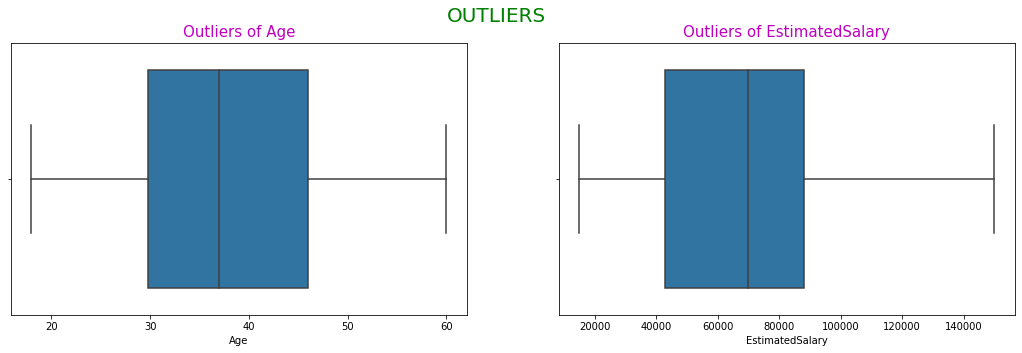

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot('Age',data=df)
plt.title("Outliers of Age",color='m',size=15)
plt.subplot(1,2,2)
sns.boxplot('EstimatedSalary',data=df)
plt.title("Outliers of EstimatedSalary",color='m',size=15)
plt.suptitle("OUTLIERS",color='g',size=20)

**No Outliers in the data**

# **Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Gender','Age','EstimatedSalary']].values 
y = df['Purchased'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

# **Feature Scaling**

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# **Fitting Decision Tree Classification to the Training set**

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train_scaled, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.36428571428571427  Cross val score :  0.8214285714285714
Depth  :  2  Training Accuracy :  0.36428571428571427  Cross val score :  0.9071428571428571
Depth  :  3  Training Accuracy :  0.36428571428571427  Cross val score :  0.8714285714285713
Depth  :  4  Training Accuracy :  0.36428571428571427  Cross val score :  0.875
Depth  :  5  Training Accuracy :  0.36428571428571427  Cross val score :  0.8607142857142858
Depth  :  6  Training Accuracy :  0.36428571428571427  Cross val score :  0.8607142857142858
Depth  :  7  Training Accuracy :  0.36428571428571427  Cross val score :  0.85
Depth  :  8  Training Accuracy :  0.36428571428571427  Cross val score :  0.8678571428571429
Depth  :  9  Training Accuracy :  0.36428571428571427  Cross val score :  0.8535714285714286
Depth  :  10  Training Accuracy :  0.36428571428571427  Cross val score :  0.8535714285714286


In [ ]:
dt = DecisionTreeClassifier(max_depth=2) # max_depth = 2 is the best value as it has high cross val score(Average of AUROC evaluation metric)
dt.fit(X_train_scaled, y_train) 

DecisionTreeClassifier(max_depth=2)

# **Predicting the Test set results**

In [ ]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# **Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_test,y_pred)

array([[72,  7],
       [ 3, 38]])

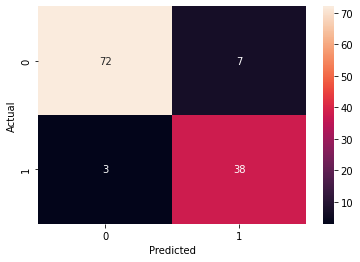

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


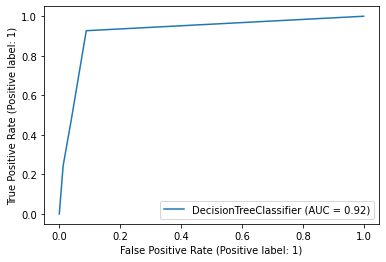

In [ ]:
plot_roc_curve(dt, X_test_scaled, y_test)

**We got auroc score of 0.94.It is very good model.**

# **Visualising the Training set results**

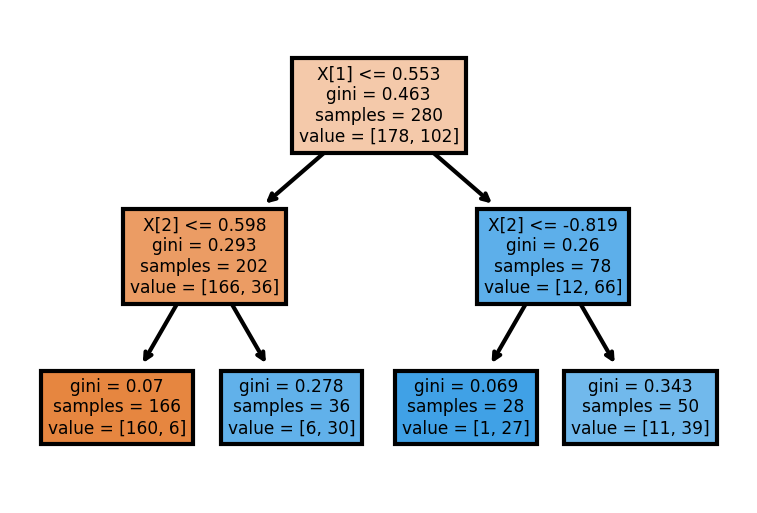

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt.fit(X_train_scaled,y_train),filled = True);
fig.savefig('image_train.png')

# **Visualising the Test set results**

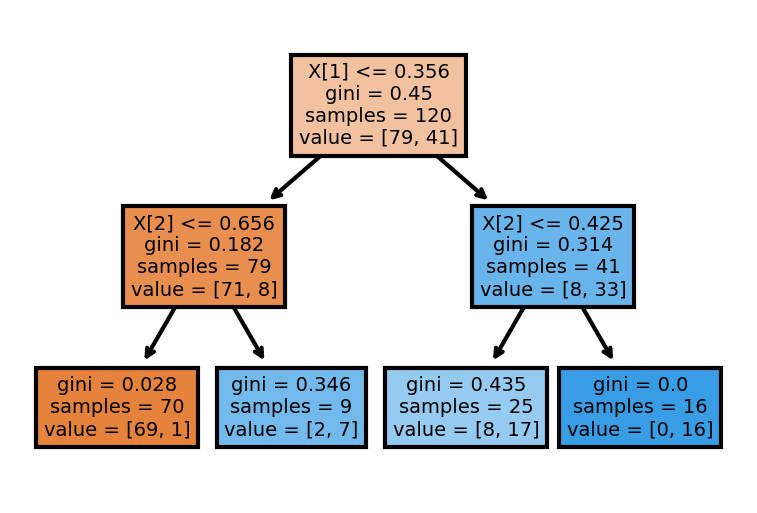

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt.fit(X_test_scaled,y_test),filled = True);
fig.savefig('image_test.png')